In [106]:
# Cell 1
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    LabelEncoder,
    OneHotEncoder,
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("Salary_Data.csv")

# Display the first few rows of the dataset
df.head()

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [107]:
# Import necessary module
# import pandas as pd
# from sklearn.impute import SimpleImputer


# Define numerical and categorical columns
numerical_cols = ["Age", "Years_of_Experience", "Salary"]
categorical_cols = ["Gender", "Education_Level", "Job_Title"]

# Impute missing values for numerical columns with mean strategy
numerical_imputer = SimpleImputer(strategy="mean")
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

# Impute missing values for categorical columns with most frequent strategy
categorical_imputer = SimpleImputer(strategy="most_frequent")
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# show result
df.head()

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [108]:
# Cell 3
# Step 2: Scale numerical values with three different methods
# Standard Scaler
standard_scaler = StandardScaler()
df_standard = df.copy()
df_standard[numerical_cols] = standard_scaler.fit_transform(df_standard[numerical_cols])

# Min-Max Scaler
minmax_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[numerical_cols] = minmax_scaler.fit_transform(df_minmax[numerical_cols])

# Robust Scaler
robust_scaler = RobustScaler()
df_robust = df.copy()
df_robust[numerical_cols] = robust_scaler.fit_transform(df_robust[numerical_cols])

# show result
df_standard.head()

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,-0.212909,Male,Bachelor's,Software Engineer,-0.510911,-0.480018
1,-0.738331,Female,Master's,Data Analyst,-0.841097,-0.953839
2,1.494713,Male,PhD,Senior Manager,1.140018,0.657152
3,0.312513,Female,Bachelor's,Sales Associate,-0.180725,-1.048603
4,2.414201,Male,Master's,Director,1.965483,1.604794


In [109]:
df_robust.head()

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,0.0,Male,Bachelor's,Software Engineer,-0.222222,-0.277778
1,-0.4,Female,Master's,Data Analyst,-0.444444,-0.555556
2,1.3,Male,PhD,Senior Manager,0.888889,0.388889
3,0.4,Female,Bachelor's,Sales Associate,0.000000,-0.611111
4,2.0,Male,Master's,Director,1.444444,0.944444


In [110]:
df_minmax.head()

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,0.268293,Male,Bachelor's,Software Engineer,0.147059,0.359103
1,0.170732,Female,Master's,Data Analyst,0.088235,0.258963
2,0.585366,Male,PhD,Senior Manager,0.441176,0.599439
3,0.365854,Female,Bachelor's,Sales Associate,0.205882,0.238935
4,0.756098,Male,Master's,Director,0.588235,0.799720


In [111]:
# Cell 4
# Step 3: Encode categorical values with two different methods
# Label Encoding
label_encoder = LabelEncoder()
df_label = df.copy()
df_label[categorical_cols] = df_label[categorical_cols].apply(
    label_encoder.fit_transform
)

# One-Hot Encoding
onehot_encoder = OneHotEncoder(drop="first", sparse=False)
df_onehot = df.copy()
df_onehot_encoded = pd.DataFrame(
    onehot_encoder.fit_transform(df_onehot[categorical_cols])
)
df_onehot = pd.concat([df_onehot, df_onehot_encoded], axis=1)
df_onehot.drop(categorical_cols, axis=1, inplace=True)

# show result
# df_label.head()
df_onehot.head()



c:\Users\Mahmoud Ali\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,Years_of_Experience,Salary,0,1,2,3,4,5,6,...,190,191,192,193,194,195,196,197,198,199
0,32.0,5.0,90000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,28.0,3.0,65000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,45.0,15.0,150000.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36.0,7.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,52.0,20.0,200000.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
df_label.head()

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,32.0,1,0,177,5.0,90000.0
1,28.0,0,3,18,3.0,65000.0
2,45.0,1,5,145,15.0,150000.0
3,36.0,0,0,116,7.0,60000.0
4,52.0,1,3,26,20.0,200000.0


In [113]:
# Check data types
print(df.dtypes)

# Check for any non-numeric values
print(df.select_dtypes(include="object"))

Age                    float64
Gender                  object
Education_Level         object
Job_Title               object
Years_of_Experience    float64
Salary                 float64
dtype: object
      Gender    Education_Level              Job_Title
0       Male         Bachelor's      Software Engineer
1     Female           Master's           Data Analyst
2       Male                PhD         Senior Manager
3     Female         Bachelor's        Sales Associate
4       Male           Master's               Director
...      ...                ...                    ...
6699  Female                PhD  Director of Marketing
6700    Male        High School        Sales Associate
6701  Female  Bachelor's Degree      Financial Manager
6702    Male    Master's Degree      Marketing Manager
6703  Female        High School        Sales Executive

[6704 rows x 3 columns]


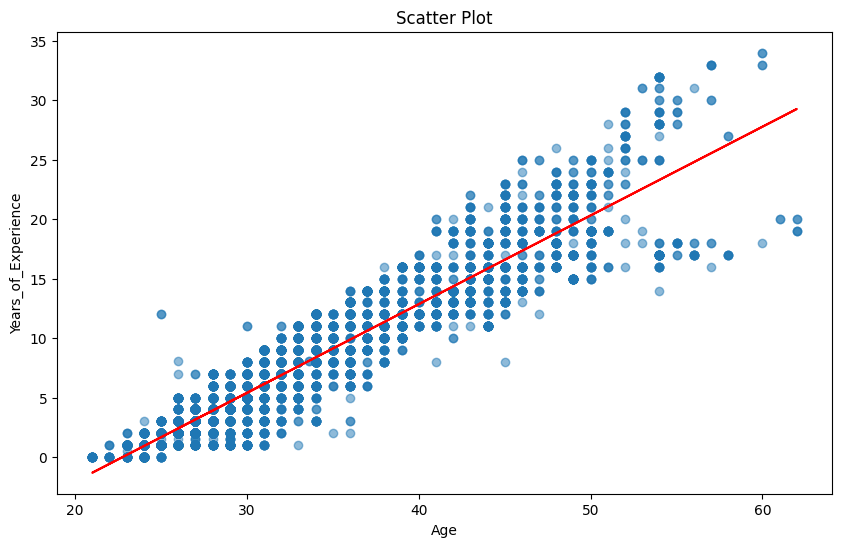

In [114]:
plt.figure(figsize=(10, 6))
plt.scatter(df.Age, df.Years_of_Experience, alpha=0.5)
plt.plot(df.Age, df.Age * 0.7462 - 16.9943, color="red")
plt.title("Scatter Plot")
plt.xlabel("Age")
plt.ylabel("Years_of_Experience")
plt.show()

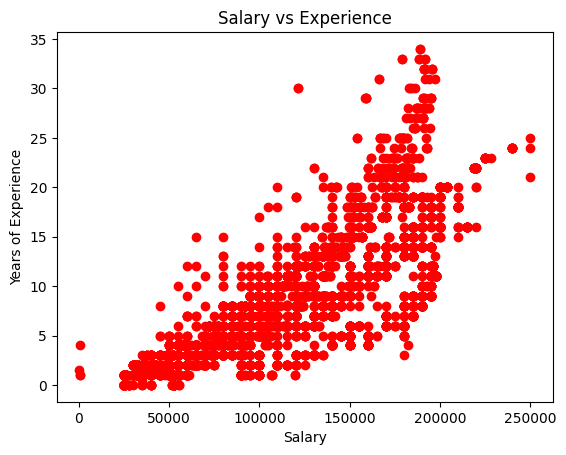

In [134]:
plt.scatter(df.Salary, df.Years_of_Experience, color="red")
plt.title("Salary vs Experience")
plt.xlabel("Salary")
plt.ylabel("Years of Experience")
plt.show()

In [116]:
df_label.head()

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,32.0,1,0,177,5.0,90000.0
1,28.0,0,3,18,3.0,65000.0
2,45.0,1,5,145,15.0,150000.0
3,36.0,0,0,116,7.0,60000.0
4,52.0,1,3,26,20.0,200000.0


In [117]:
# Import necessary module
from sklearn.model_selection import train_test_split

# Step 4: Split the data into training and testing sets
# X = df_df_label.drop(
#     "Years_of_Experience", axis=1


# X = df_label["Age", "Gender", "Education_Level", "Job_Title", "Years_of_Experience"]

feat = ["Years_of_Experience"]
X = df_label[feat]
y = df_label["Salary"]

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [118]:
# Check if X_train and X_test are pandas DataFrame
if isinstance(X_train, pd.DataFrame) and isinstance(X_test, pd.DataFrame):
    # Convert column names to string
    X_train.columns = X_train.columns.astype(str)
    X_test.columns = X_test.columns.astype(str)
else:
    print("X_train and X_test should be pandas DataFrame")

In [119]:

# Cell 6
# Step 5: Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# show result



LinearRegression()

In [120]:
print(model.coef_)
print(model.intercept_)

[7188.48580853]
57147.32083064561


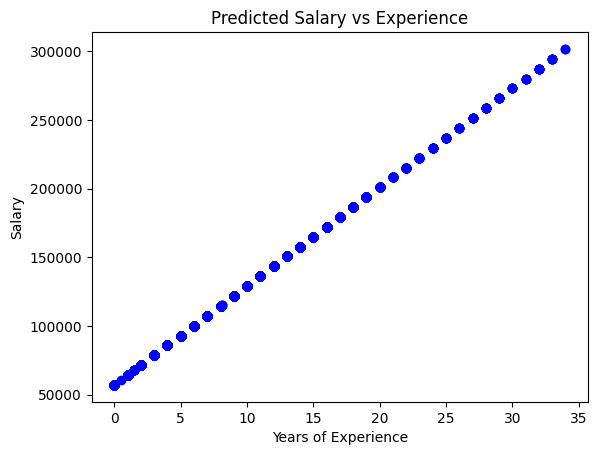

In [121]:
# Assuming X is a DataFrame and 'Years_of_Experience' is one of its columns
plt.scatter(X, model.predict(X), color="blue")
plt.title("Predicted Salary vs Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [122]:




# Test the model and make predictions
y_pred_sec = model.predict(X_train)

# Show result
# y_pred
print(y_pred_sec)

[150597.6363415  215294.00861825  78712.77825623 ... 150597.6363415
 157786.12215003  85901.26406476]


In [123]:
print(len(X))
print(len(y))

6704
6704


In [124]:
print(len(X_train))
print(len(y_pred_sec))

5028
5028


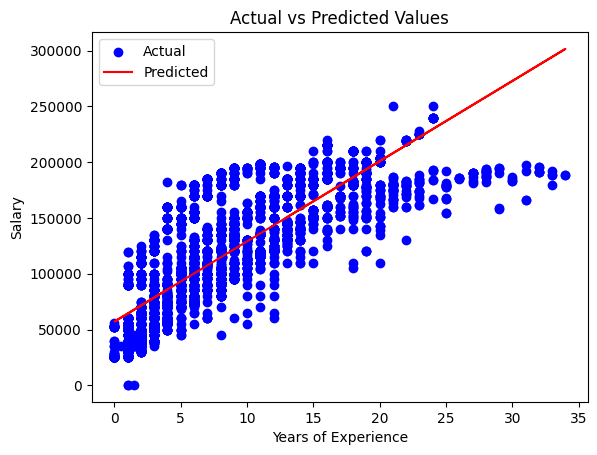

In [125]:
# Visualize the actual vs predicted results
plt.scatter(X_train, y_train, color="blue", label="Actual")
plt.plot(X_train, y_pred_sec, color="red", label="Predicted")
plt.title("Actual vs Predicted Values")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [126]:
print("R2 = ", r2_score(y_train, y_pred_sec))
print("MAE = ", mean_absolute_error(y_train, y_pred_sec))
print("MRSE = ", mean_squared_error(y_train, y_pred_sec))


R2 =  0.6610558554953163
MAE =  24667.539631882406
MRSE =  946559995.6496428


In [127]:
y_test_pred = model.predict(X_test)



In [128]:
print(len(X_train))
print(len(y_train))
print(len(y_test_pred))

5028
5028
1676


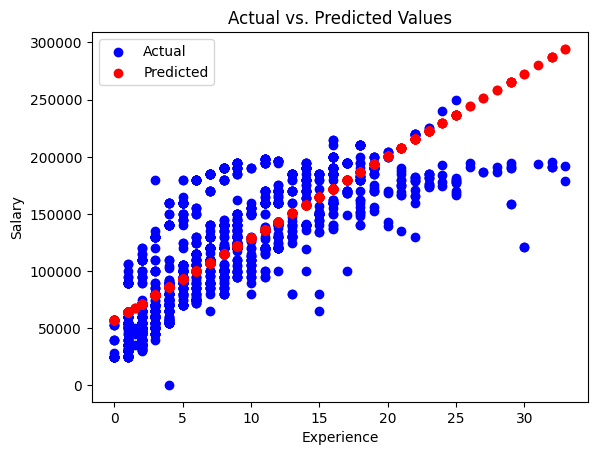

In [135]:
# Visualize the predicted results vs. actual results
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.scatter(X_test, y_test_pred, color="red", label="Predicted")
plt.title("Actual vs. Predicted Values")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [130]:
# Assuming 'model' is your trained model and 'feat' is your feature list

# New data
new_data = pd.DataFrame(
    {
        "Age": [
            35,
            40,
            42,
            28,
            37,
            33,
            45,
            38,
            29,
            41,
            36,
            44,
            30,
            39,
            43,
            31,
            34,
            47,
            46,
            32,
            48,
            49,
        ],
        "Gender": [
            "Male",
            "Female",
            "Male",
            "Female",
            "Male",
            "Female",
            "Male",
            "Female",
            "Male",
            "Female",
            "Male",
            "Female",
            "Male",
            "Female",
            "Male",
            "Female",
            "Male",
            "Female",
            "Male",
            "Female",
            "Male",
            "Female",
        ],
        "Education_Level": [
            "Bachelor's",
            "Master's",
            "PhD",
            "Bachelor's",
            "Master's",
            "PhD",
            "Bachelor's",
            "Master's",
            "PhD",
            "Bachelor's",
            "Master's",
            "PhD",
            "Bachelor's",
            "Master's",
            "PhD",
            "Bachelor's",
            "Master's",
            "PhD",
            "Bachelor's",
            "Master's",
            "PhD",
            "Bachelor's",
        ],
        "Job_Title": [
            "Software Engineer",
            "Data Analyst",
            "Senior Manager",
            "Sales Associate",
            "Data Scientist",
            "Software Engineer",
            "Data Analyst",
            "Senior Manager",
            "Sales Associate",
            "Data Scientist",
            "Software Engineer",
            "Data Analyst",
            "Senior Manager",
            "Sales Associate",
            "Data Scientist",
            "Software Engineer",
            "Data Analyst",
            "Senior Manager",
            "Sales Associate",
            "Data Scientist",
            "Software Engineer",
            "Data Analyst",
        ],
        "Years_of_Experience": [
            7,
            10,
            12,
            4,
            9,
            6,
            15,
            8,
            3,
            11,
            7,
            14,
            2,
            10,
            13,
            5,
            8,
            16,
            15,
            6,
            17,
            18,
        ],
    }
)

# Preprocess new_data
# If your model needs numerical input for categorical data, you need to convert categorical variables into numerical
# Here, we'll use LabelEncoder as an example
from sklearn.preprocessing import LabelEncoder

for column in new_data.columns:
    if new_data[column].dtype == type(object):
        le = LabelEncoder()
        new_data[column] = le.fit_transform(new_data[column])

# Ensure new_data has the same columns as X_train
missing_cols = set(X_train.columns) - set(new_data.columns)
for c in missing_cols:
    new_data[c] = 0
new_data = new_data[X_train.columns]

# Predict the output for new_data
new_data_predictions = model.predict(new_data)

# Print the predictions
print(new_data_predictions)

[107466.72149034 129032.17891592 143409.15053298  85901.26406476
 121843.69310739 100278.23568181 164974.60795856 114655.20729887
  78712.77825623 136220.66472445 107466.72149034 157786.12215003
  71524.2924477  129032.17891592 150597.6363415   93089.74987328
 114655.20729887 172163.09376709 164974.60795856 100278.23568181
 179351.57957561 186540.06538414]


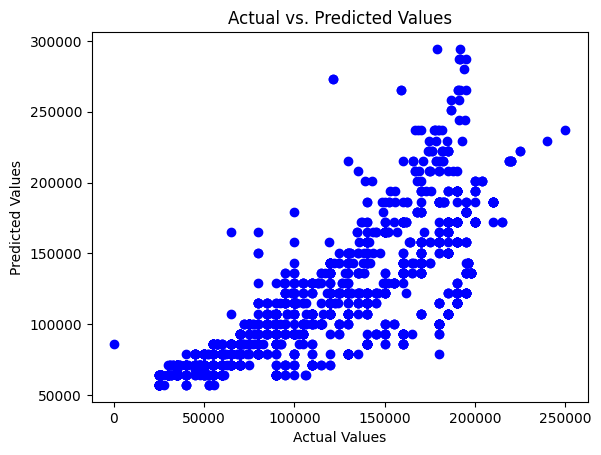

In [131]:
# Predict the output for X_test
y_pred = model.predict(X_test)

# Visualize the predicted results vs. actual results
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color="blue")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

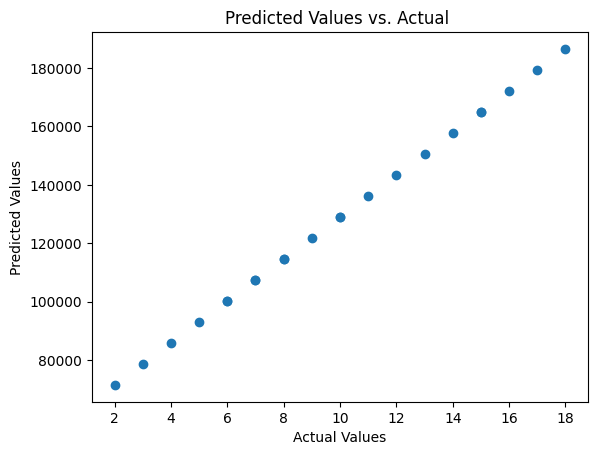

In [132]:
# Cell 8
# Step 7: Visualize the predicted results vs. actual results
plt.scatter(new_data, new_data_predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted Values vs. Actual ")
plt.show()

In [133]:
# Cell 9
# Step 8: Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

R-squared: 0.6328183809920178
Mean Absolute Error: 24964.03849043593
Root Mean Squared Error: 31804.19704617068
